In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import time

%matplotlib ipympl
import matplotlib as mpl
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits import mplot3d # to make interactive 3d plots
import os
from os import path

#%matplotlib notebook

In [2]:
from platform import python_version
print(python_version())

3.8.16


In [3]:
# define a MATLAB-like patch function

def patch_b(ax, x, y, z, color='blue',alpha=0.25):
    pc = Poly3DCollection([list(zip(x,y,z))],linewidths=1,alpha=alpha)       
    pc.set_facecolor(color)                                                       
    ax.add_collection3d(pc)                         
    return pc

def patch_c(ax, x, y, z, color='cyan',alpha=0.25):
    pc = Poly3DCollection([list(zip(x,y,z))],linewidths=1,alpha=alpha)       
    pc.set_facecolor(color)                                                       
    ax.add_collection3d(pc)                         
    return pc

def patch_y(ax, x, y, z, color='yellow',alpha=0.25):
    pc = Poly3DCollection([list(zip(x,y,z))],linewidths=1,alpha=alpha)       
    pc.set_facecolor(color)                                                       
    ax.add_collection3d(pc)                         
    return pc

def patch_r(ax, x, y, z, color='red',alpha=0.25):
    pc = Poly3DCollection([list(zip(x,y,z))],linewidths=1,alpha=alpha)       
    pc.set_facecolor(color)                                                       
    ax.add_collection3d(pc)                         
    return pc

In [4]:
def DrawBackground(drug,tmax,timeStep,xmin,xmax,ymin,ymax):
    drugmin=np.min(np.min(drug)); drugmax=np.max(np.max(drug)); drugstep=(drugmax-drugmin)/4
    kk=tmax/timeStep
    (Nx,Ny)=drug.shape; hgx=(xmax-xmin)/Nx; hgy=(ymax-ymin)/Ny;
    
    for ii in range(1,Nx+1):
        for jj in range(1,Ny+1):
            
            if drug[ii-1,jj-1]>=drugmin and drug[ii-1,jj-1]<(drugmin+drugstep):
                aa=[xmin+(ii-1)*hgx, xmin+ii*hgx, xmin+ii*hgx, xmin+(ii-1)*hgx, xmin+(ii-1)*hgx]
                bb=[kk, kk, kk, kk, kk]
                cc=[ymin+(jj-1)*hgy, ymin+(jj-1)*hgy, ymin+jj*hgy, ymin+jj*hgy, ymin+(jj-1)*hgy]
                patch_b(ax, aa, bb, cc)
                
            elif drug[ii-1,jj-1]>=(drugmin+drugstep) and drug[ii-1,jj-1]<(drugmin+2*drugstep):
                aa=[xmin+(ii-1)*hgx, xmin+ii*hgx, xmin+ii*hgx, xmin+(ii-1)*hgx, xmin+(ii-1)*hgx]
                bb=[kk, kk, kk, kk, kk]
                cc=[ymin+(jj-1)*hgy, ymin+(jj-1)*hgy, ymin+jj*hgy, ymin+jj*hgy, ymin+(jj-1)*hgy]
                patch_c(ax, aa, bb, cc)
                
            elif drug[ii-1,jj-1]>=(drugmin+2*drugstep) and drug[ii-1,jj-1]<(drugmin+3*drugstep):
                aa=[xmin+(ii-1)*hgx, xmin+ii*hgx, xmin+ii*hgx, xmin+(ii-1)*hgx, xmin+(ii-1)*hgx]
                bb=[kk, kk, kk, kk, kk]
                cc=[ymin+(jj-1)*hgy, ymin+(jj-1)*hgy, ymin+jj*hgy, ymin+jj*hgy, ymin+(jj-1)*hgy]
                patch_y(ax, aa, bb, cc)
                
            else:
                aa=[xmin+(ii-1)*hgx, xmin+ii*hgx, xmin+ii*hgx, xmin+(ii-1)*hgx, xmin+(ii-1)*hgx]
                bb=[kk, kk, kk, kk, kk]
                cc=[ymin+(jj-1)*hgy, ymin+(jj-1)*hgy, ymin+jj*hgy, ymin+jj*hgy, ymin+(jj-1)*hgy]
                patch_r(ax, aa, bb, cc)

In [5]:
def DefineColorPalette():
    col = np.array([[255,0,255],[255,0,0],[0,255,255],[0,0,255],[0,255,0],[0,0,0],[255,191,0],\
                    [255,255,0],[191,255,0],[128,128,0],[255,182,193],[0,191,255],[0,128,255],\
                    [250,235,215],[128,0,255],[154,205,50],[255,0,128],[102,0,0],[102,77,0],\
                    [0,102,102],[204,204,255],[255,204,255],[153,204,255],[255,153,153],[0,153,0],\
                    [0,153,153],[153,0,77],[255,228,225],[128,0,0],[102,102,153],[153,255,204],\
                    [218,112,214],[255,128,0],[192,192,192],[128,128,128],[75,0,130],[165,42,42],\
                    [216,191,216],[220,20,60],[245,222,179],[255,99,71],[255,127,80],[205,92,92],\
                    [240,128,128],[233,150,122],[250,128,114],[255,160,122],[255,69,0],\
                    [255,140,0],[255,165,0],[255,215,0],[184,134,11],[218,165,32],[0,100,0],\
                    [255,240,245],[188,143,143],[255,248,220],[50,205,50],[144,238,144],\
                    [152,251,152],[143,188,143],[0,250,154],[0,255,127],[46,139,87],[102,205,170],\
                    [60,179,113],[32,178,170],[47,79,79],[0,128,128],[0,139,139],[240,230,140],\
                    [245,245,220],[224,255,255],[0,206,209],[255,228,181],[255,20,147],\
                    [175,238,238],[127,255,212],[176,224,230],[95,158,160],[70,130,180],\
                    [100,149,237],[222,184,135],[30,144,255],[238,232,170],[189,183,107],\
                    [107,142,35],[124,252,0],[127,255,0],[173,255,47],\
                    [178,34,34],[221,160,221],[255,235,205]])/255
    return col

In [6]:
def find(condition):
    res, = np.nonzero(np.ravel(condition))
    return res

In [7]:
def linG3DAliveClone(pathdata,cloneNum,IsGradient,xmin,xmax,ymin,ymax,tmin,tmax,fileStep,toPrint):
    """
    This is a companion code for the paper "LinG3D: Visualizing the
    Spatio-Temporal Dynamics of Clonal Evolution" by A. Hu, A.M.E.
    Ojwang', K.D. Olumoyin, and K.A. Rejniak
    
    This code generates the 3D lineage tree of one clone of number
    specified in 'cloneNum' taking into account only the cells that
    survived to the end of simulation. It uses data from directory
    'pathData'.
    
    The following parameters need to be specified:
        pathData  -- directory with input data
        cloneNum  -- clone number to be drawn
        IsGradient -- 1 to draw drug in the background, 0 not to draw
        xmin,xmax,ymin,ymax -- dimensions of the spacial domain
        tmin, tmax          -- dimensions of the temporal domain
        fileStep            -- frequency of the sampled data
        toPrint    -- 1 to save the generated figure, 0 not to save
        
    It requires the following data in the pathData/data/ directory:
        cell_history.txt -- file with info about each cell
        cellID_##.txt    -- cell IDs in a file with index number ##
        cellXY_##.txt    -- cell coordinates in a file with index ##
        drug.txt         -- concentration of a drug for background
    
    for the examples discussed in the paper use:
        example 1: pathData='exampleB05';  cloneNum between 0 and 9
        example 2: pathData='exampleB005'; cloneNum between 0 and 147
        example 3: pathData='exampleExp';  numClones=10;
        
    January 10, 2024
    """
    
    dataDirectory = '/data/' # directory with cell and drug data
    timeStep=(tmax-tmin)/(2.5*(xmax-xmin))

    plt.grid()
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([tmin, tmax // timeStep])
    ax.set_zlim([ymin, ymax])
    
    col=DefineColorPalette()
    Ncol=col[:,0].shape[0]

    if toPrint==1:
        pathFigs=pathData+'/fig_clonesAlive';
        if path.exists(pathFigs):
            pass
        else:
            os.mkdir(pathFigs)
    
    # draw background with drug gradient
    if IsGradient == 1:
        drug = np.loadtxt(pathData + dataDirectory + 'drug.txt')
        DrawBackground(drug, tmax, timeStep, xmin, xmax, ymin, ymax)
        
    # load cell history file
    hist = np.loadtxt(pathData + dataDirectory + 'cell_history.txt')
    # [cell ID, clone ID, mother ID, birth iter, div / death iter]
    
    # load indices of all survived cells
    cellID = np.loadtxt(pathData + dataDirectory + 'cellID_' + str(tmax) + '.txt')
    # print(cellID.shape)  
    
    print('clone=' + str(cloneNum))
    
    # identify all survived cells from a given clone
    indLast = []
    Nlast = 0
    
    for ii in range(len(cellID)):  # all cells in the last file
        if hist[int(cellID[ii])-1,1] == cloneNum:
            indLast.append(cellID[ii])
            Nlast += 1
    Numlast = Nlast
    for ii in range(Numlast):
            
        moNum = hist[int(indLast[ii])-1,2]
        while moNum > 0 and (hist[int(moNum)-1,1] == cloneNum):  # all predecesor cells
            indLast.append(moNum)
            Nlast += 1
            moNum = hist[int(moNum)-1,2]
    indLast = np.unique(indLast)  # remove repeated cells
    # print(indLast)
        
    # define matrix of line segments (3D branches) to draw
    matrix_to_draw = np.zeros((1, 6))  # [x1, t1, y1, x2, t2, y2] X - time - Y axes
    Nmatrix = 0
        
    for ii in range(len(indLast)):  # for every cell with index in indLast
        if ii % 100 == 0:
            print('... calculating')
                
        cellNum = hist[int(indLast[ii])-1,0]  # cell ID
        # print(cellNum)
        mothNum = hist[int(indLast[ii])-1,2]  # mother ID
        strtNum = hist[int(indLast[ii])-1,3]  # cell birth
        endNum = hist[int(indLast[ii])-1,4]
        endNum = max(tmax, min(endNum, tmax)) # cell div / death / tmax
            
        # find all appearances of the cellNum
        kkStart = fileStep * np.floor(strtNum / fileStep)  # initial file number
        kkEnd = fileStep * np.floor(endNum / fileStep)  # final file number
        kkStart = int(kkStart)
        kkEnd = int(kkEnd)
        # print(kkStart)
            
        for kk in range(kkEnd, kkStart, - fileStep):  # inspect all files
            # cell ID and cell XY from the first file
            fileMeID = np.loadtxt(pathData + dataDirectory + 'cellID_' + str(kk) + '.txt')  
            fileMeXY = np.loadtxt(pathData + dataDirectory + 'cellXY_' + str(kk) + '.txt')
                
            indMe = find(fileMeID == cellNum) # find current indices of cellID
            # print(indMe)
                
            fileMe2ID = np.loadtxt(pathData + dataDirectory + 'cellID_' + str(kk - fileStep) + '.txt')
            fileMe2XY = np.loadtxt(pathData + dataDirectory + 'cellXY_' + str(kk - fileStep) + '.txt')
                
            indMe2 = find(fileMe2ID == cellNum)  # find current indices of cellID
            # print(indMe2)
                
            if indMe.size == 0:
                pass
            elif indMe2.size == 0:
                # print(indMe)                  
                while kkStart < hist[int(mothNum)-1,3]:  # find file with the grand-mother cell
                    mothNum = hist[int(mothNum)-1,2]
                fileMe2ID = np.loadtxt(pathData + dataDirectory + 'cellID_' + str(kkStart) + '.txt')
                fileMe2XY = np.loadtxt(pathData + dataDirectory + 'cellXY_' + str(kkStart) + '.txt')
                    
                indMe2 = find(fileMe2ID == mothNum)  # find current indices of mother cellID
                # print(indMe2)
                if indMe2.size == 0:
                    pass
                else:
                    matrix_to_draw = np.row_stack((matrix_to_draw, np.zeros((1, 6))))
                    matrix_to_draw[Nmatrix, :] = [fileMeXY[indMe][0][0], kkStart + fileStep,
                                                fileMeXY[indMe][0][1], fileMe2XY[indMe2][0][0],
                                                kkStart, fileMe2XY[indMe2][0][1]]
                    Nmatrix += 1  # save branch to draw [x1,t1,y1,x2,t2,y2]
            else:
                matrix_to_draw = np.row_stack((matrix_to_draw, np.zeros((1, 6))))
                matrix_to_draw[Nmatrix, :] = [fileMe2XY[indMe2][0][0], kk - fileStep,
                                                  fileMe2XY[indMe2][0][1], fileMeXY[indMe][0][0],
                                                  kk, fileMeXY[indMe][0][1]]
                Nmatrix += 1  # save branch to draw [x1,t1,y1,x2,t2,y2]


    
    # drawing clones
    NumCol = cloneNum % Ncol  # clone color
    # plt.title('survived cells from clone=' + str(cloneNum))
    plt.ylabel('iterations/time x ' + str(timeStep),fontsize=8)

    for ii in range(Nmatrix):
        x = [matrix_to_draw[ii,0], matrix_to_draw[ii,3]]
        y = [matrix_to_draw[ii,1], matrix_to_draw[ii,4]]
        y = [yi / timeStep for yi in y]
        z = [matrix_to_draw[ii,2], matrix_to_draw[ii,5]]
        ax.plot(x, y, z, c=col[NumCol,:3],linewidth=1.3)
    tm = tmax/timeStep
    ax.view_init(40,-130)
    ax.set_box_aspect([1,2.5,1])
    # ax.set_xticks([-xmin,-xmin*0.5,0,0.5*xmax,xmax])
    ax.set_yticks([tm,tm-tm*.2,tm-tm*.4,tm-tm*.6,tm-tm*.8,0])
    # ax.set_zticks([-xmin,-xmin*0.5,0,0.5*xmax,xmax])
    ax.set_ylim(0,tm)
        
    if toPrint==1:
        plt.savefig(pathFigs + "/tree_alive_clone_"+ str(cloneNum)+'.jpg', dpi=300)
    
    plt.show()
    

clone=5
... calculating


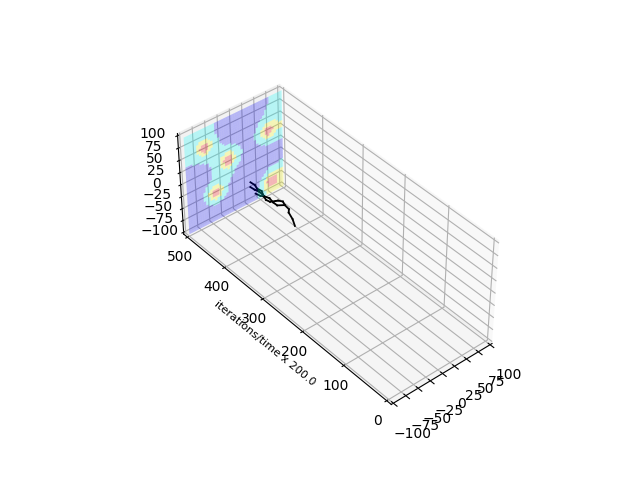

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

if __name__ == '__main__':
    
    pathData='exampleB005'
    cloneNum=5
    toPrint=1                # save the final figure
    IsGradient = 1           # draw drug gradient in the background 1-yes; 0-no;
    xmin=-100; xmax=100; ymin=xmin; ymax=xmax  # 2D domain boundaries
    tmin=0; tmax=100000                        # time/iteration boundaries
    fileStep = 2000       # frequency of data 
    
    linG3DAliveClone(pathData,cloneNum,IsGradient,xmin,xmax,ymin,ymax,tmin,tmax,fileStep,toPrint)